In [1]:
import numpy as np
import pandas as pd
import sys
import wfdb
import matplotlib.pyplot as plt
import scipy
%matplotlib notebook

### challenge data

In [2]:
fname = 'A00001'

In [6]:
record = wfdb.rdsamp('training2017/{}'.format(fname))

In [8]:
record

(array([[-0.127],
        [-0.162],
        [-0.197],
        ...,
        [-0.018],
        [-0.022],
        [-0.021]]),
 {'comments': [],
  'fs': 300,
  'n_sig': 1,
  'sig_len': 9000,
  'sig_name': ['ECG'],
  'units': ['mV']})

In [10]:
record[1]

{'comments': [],
 'fs': 300,
 'n_sig': 1,
 'sig_len': 9000,
 'sig_name': ['ECG'],
 'units': ['mV']}

In [11]:
record[0]

array([[-0.127],
       [-0.162],
       [-0.197],
       ...,
       [-0.018],
       [-0.022],
       [-0.021]])

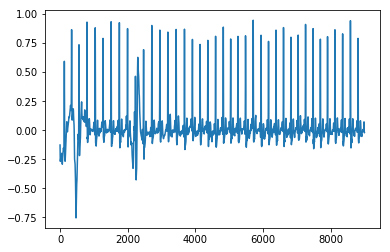

In [14]:
plt.plot(record[0]);

In [24]:
record2 = wfdb.rdrecord('training2017/{}'.format(fname))

In [39]:
idx = record2.adc()/1000==record[0]

In [43]:
foo = np.arange(9000)

In [50]:
foo[~idx.reshape(-1)]

array([], dtype=int32)

### MIT vent data

In [47]:
record = wfdb.rdsamp('418')

In [5]:
record

(array([[-0.64 , -0.07 ],
        [-0.91 , -0.065],
        [-0.935, -0.06 ],
        ...,
        [-0.495, -0.245],
        [-0.58 , -0.295],
        [-0.68 , -0.325]]),
 {'comments': [],
  'fs': 250,
  'n_sig': 2,
  'sig_len': 525000,
  'sig_name': ['ECG', 'ECG'],
  'units': ['mV', 'mV']})

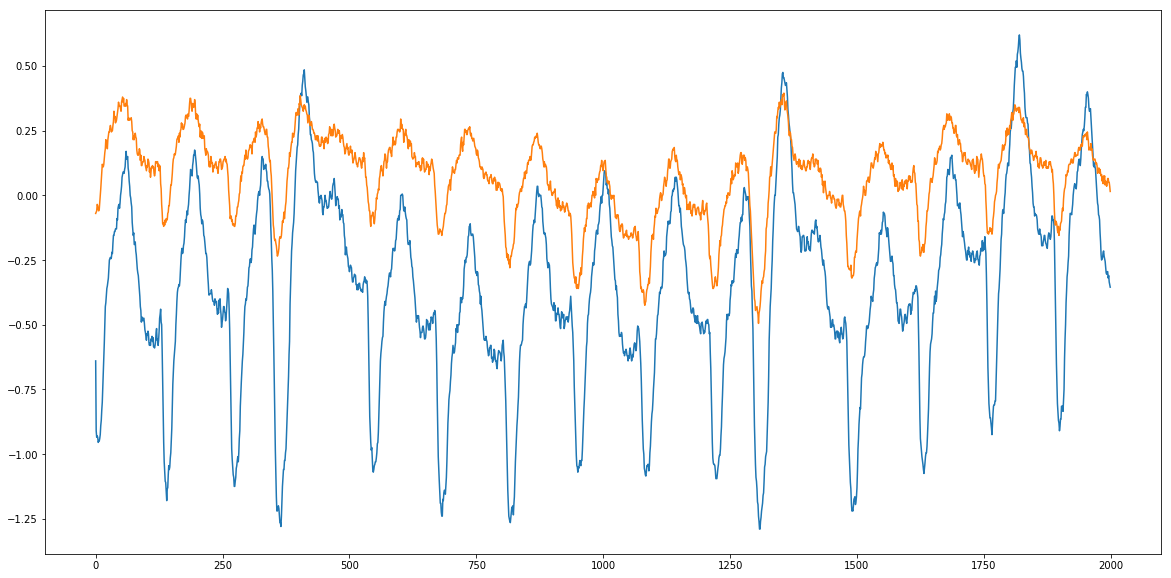

In [6]:
plt.figure(figsize=(20,10))
plt.plot(record[0][0:2000,:]);

In [2]:
ann = wfdb.rdann('418','atr')

In [27]:
wfdb.plot_items(record[0])

TypeError: 'Record' object does not support indexing

In [3]:
record = wfdb.rdrecord('418')

<IPython.core.display.Javascript object>


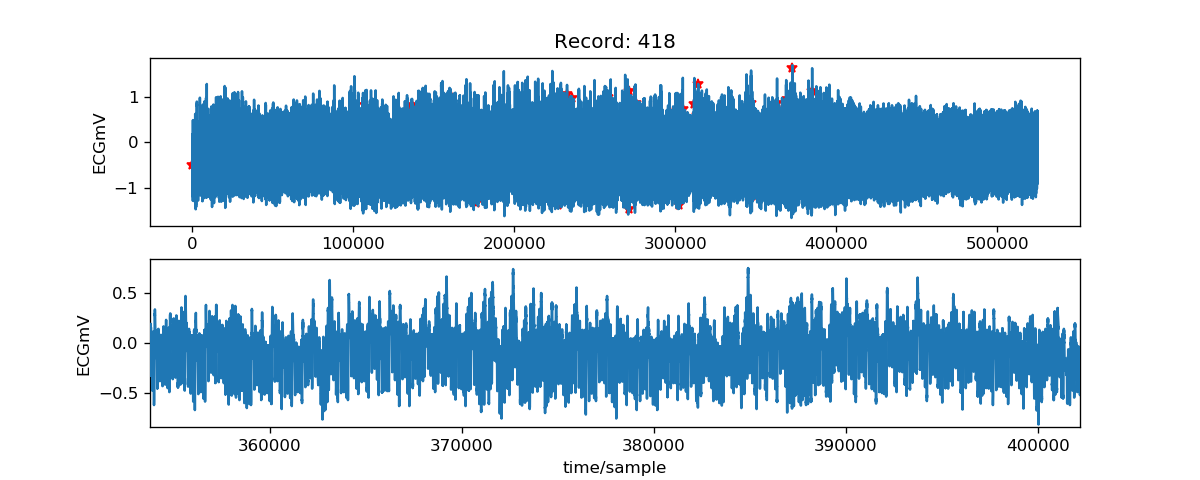

In [4]:
wfdb.plot_wfdb(record,ann,figsize=(10,4))

In [14]:
ann.sample

array([    18,  99624, 101499, 133092, 134038, 135775, 136628, 153057,
       154115, 154942, 156291, 159442, 160516, 169192, 169807, 173054,
       173673, 174788, 175403, 176259, 177868, 190080, 191249, 191807,
       192695, 195631, 196794, 200211, 200634, 216788, 219038, 219961,
       224019, 225355, 226057, 227211, 229269, 231310, 232724, 234499,
       235538, 254230, 255365, 256019, 256884, 257249, 257980, 259557,
       261903, 262749, 263519, 269307, 270999, 271326, 271596, 272057,
       272384, 273673, 275846, 279576, 281384, 289384, 291211, 300480,
       301076, 301525, 301711, 302230, 302538, 302871, 303346, 303641,
       304634, 311442, 311807, 312096, 313480, 313826, 314173, 314493,
       316807, 317237, 317480, 318682, 319769, 327480, 329038, 329365,
       329749, 333826, 334211, 339769, 340019, 346634, 347038, 347403,
       347730, 357634, 358403, 362711, 363115, 367749, 368134, 368583,
       369211, 370153, 370557, 370971, 371653, 372041, 372692, 373076,
      

In [18]:
ann.num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
ann.chan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### downloading

In [28]:
wfdb.get_dbs()

[['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database [sample excluded record]'],
 ['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['chfdb', 'BIDMC Congestive Heart Failure Database'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['capslpdb', 'CAP Sleep Database'],
 ['crisdb', 'CAST RR Interval Sub-Study Database'],
 ['challenge/2009/test-set-a', 'Challenge 2009 Test Set A'],
 ['challenge/2009/test-set-b', 'Challenge 2009 Test Set B'],
 ['challenge/2010/set-a', 'Challenge 2010 Training Set A'],
 ['challenge/2010/set-b', 'Challenge 2010 Test Set B'],
 ['challenge/2010/set-c', 'Challenge 2010 Test Set C'],
 ['challenge/2011/set-a', 'Challenge 2011 Training Set A'],
 ['challenge/2011/set-b', 'Challenge 2011 Test Set B'],
 ['challenge/2011/sim', 'Challenge 2011 Pilot Set'],
 ['challenge/2013/set-a', 'Challenge 2013 Training Set A'],
 ['challenge/2013/set-b', 

In [30]:
wfdb.get_record_list('mitdb')

['100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '121',
 '122',
 '123',
 '124',
 '200',
 '201',
 '202',
 '203',
 '205',
 '207',
 '208',
 '209',
 '210',
 '212',
 '213',
 '214',
 '215',
 '217',
 '219',
 '220',
 '221',
 '222',
 '223',
 '228',
 '230',
 '231',
 '232',
 '233',
 '234']

In [36]:
wfdb.dl_database('mitdb', 'C:\\Users\\pierrecurie\\Documents\\galvanize\\capstone', records=['100'])

Finished downloading files


In [34]:
pwd

'C:\\Users\\pierrecurie\\Documents\\galvanize\\capstone'

<IPython.core.display.Javascript object>


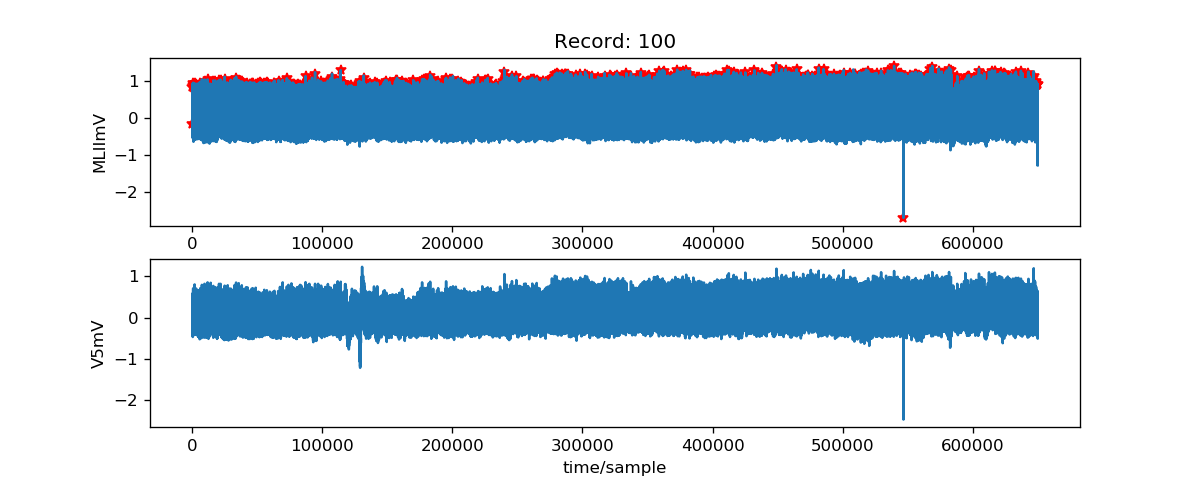

In [38]:
record = wfdb.rdrecord('100')
ann = wfdb.rdann('100','atr')
wfdb.plot_wfdb(record,ann,figsize=(10,4))

### xqrs

In [43]:
from wfdb import processing

In [54]:
xqrs = processing.XQRS(record[0][:,0], record[1]['fs'])

In [56]:
xqrs.detect()

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


In [53]:
record[1]

{'comments': [],
 'fs': 250,
 'n_sig': 2,
 'sig_len': 525000,
 'sig_name': ['ECG', 'ECG'],
 'units': ['mV', 'mV']}

<IPython.core.display.Javascript object>


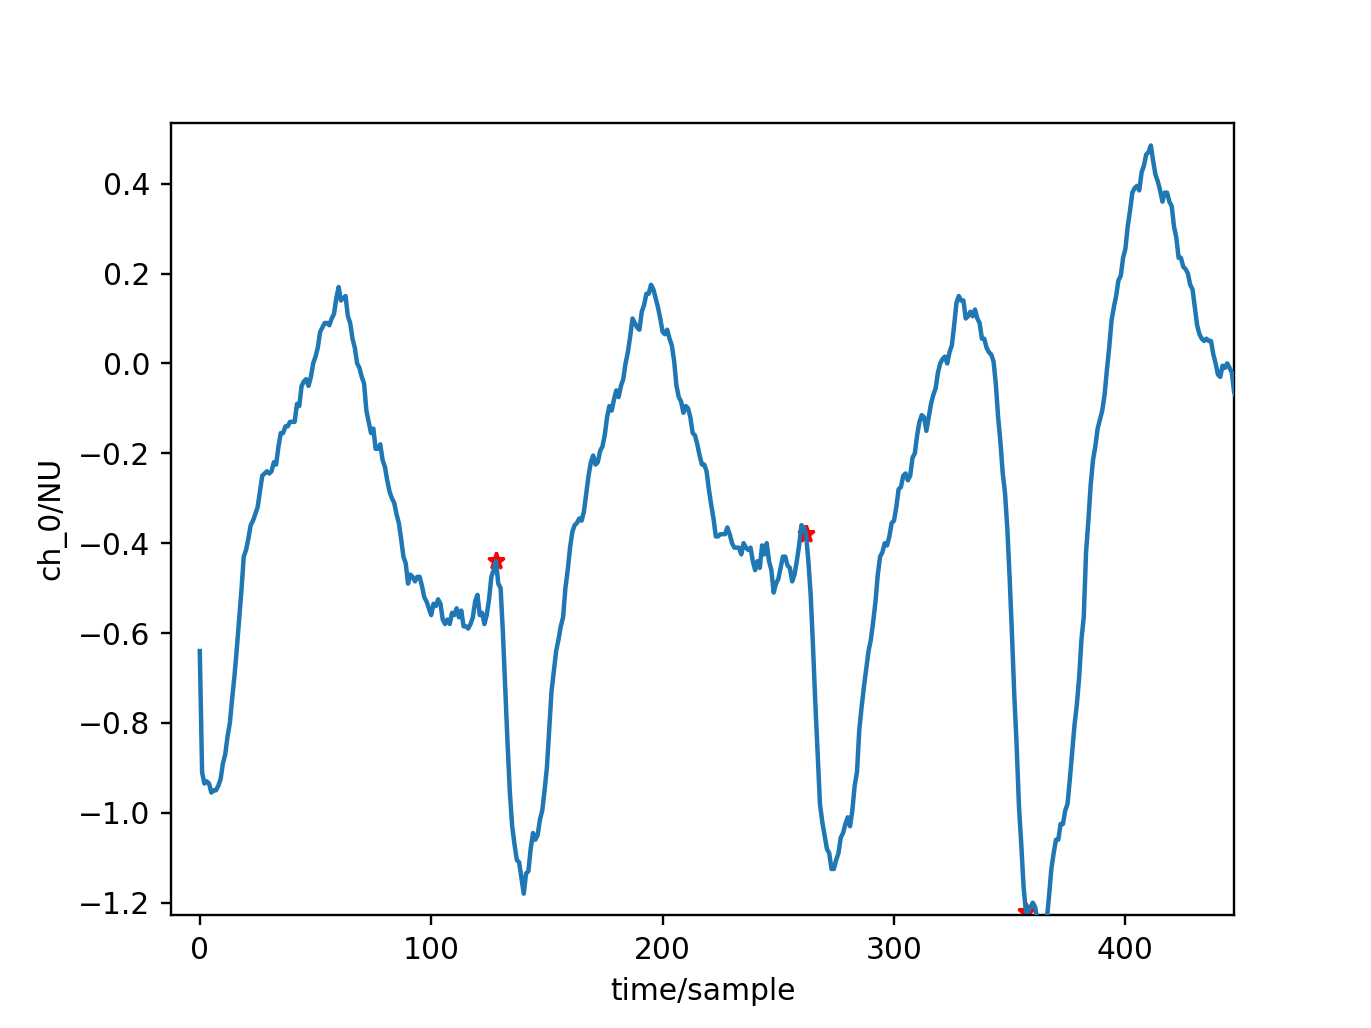

In [57]:
wfdb.plot_items(record[0][:,0], ann_samp=[xqrs.qrs_inds])